# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import io
import numpy as np


# Study data files
path_data_21 = "data/data_2021.csv"
path_data_20 = "data/data_2020.csv"
path_data_19 = "data/data_2019.csv"
path_data_18 = "data/data_2018.csv"
# Read the mouse data and the study results
metadata_21 = pd.read_csv(path_data_21, encoding = 'utf-8', low_memory = False, thousands = ',')
metadata_20 = pd.read_csv(path_data_20, encoding = 'utf-8', low_memory = False, thousands = ',')
metadata_19 = pd.read_csv(path_data_19, encoding = 'utf-8', low_memory = False, thousands = ',')
metadata_18 = pd.read_csv(path_data_18, encoding = 'utf-8', low_memory = False, thousands = ',')
# Creating a Data Frame
data_21 = pd.DataFrame(metadata_21)
data_20 = pd.DataFrame(metadata_20)
data_19 = pd.DataFrame(metadata_19)
data_18 = pd.DataFrame(metadata_18)
# data_18 = data_18.drop(['AREA', 'NAICS', 'NAICS_TITLE', 'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'EMP_PRSE'], 
#                            axis = 1)
# # Display the data table for preview
# data_18 = pd.DataFrame(data_18)
# data_18.head()

In [2]:
# Filterning results for Registered nurses - State Level
gen_data_states = pd.DataFrame()
df = [data_21, data_20, data_19, data_18]
x = 21
for data_frame in df:
    data_frame = data_frame.drop(['AREA', 'NAICS', 'NAICS_TITLE', 'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'EMP_PRSE', 'PCT_TOTAL', 'MEAN_PRSE'], 
                           axis = 1)
    data_rn = data_frame.loc[data_frame['OCC_TITLE'] == 'Registered Nurses']
    data_rn = data_rn.loc[data_rn['AREA_TYPE'] == 2]
    new_names = [(i, i + ' ' + str(x)) for i in data_rn.iloc[:, 1:].columns.values]
    data_rn.rename(columns = dict(new_names), inplace = True)
    data_rn1 = pd.DataFrame(data_rn)
    if x == 21:
        gen_data_states = pd.DataFrame(data_rn1)
    else:
        gen_data_states = pd.merge(gen_data_states, data_rn1, on = 'AREA_TITLE', sort = True)
    x = x - 1

# Drawing some results
for i in range (18,21):
    gen_data_states[f'Difference in an Hourly Mean Rate for {str(i)}-{str(i+1)}'] = gen_data_states[f'H_MEAN {str(i+1)}'].astype(float) - gen_data_states [f'H_MEAN {str(i)}'].astype(float)
    gen_data_states[f'Difference in Annual Mean Rate for {str(i)}-{str(i+1)}'] = gen_data_states[f'A_MEAN {str(i+1)}'].str.replace(',', '').astype(float) - gen_data_states [f'A_MEAN {str(i)}'].str.replace(',', '').astype(float)
    gen_data_states[f'Difference in Hourly Median Rate for {str(i)}-{str(i+1)}'] = gen_data_states[f'H_MEDIAN {str(i+1)}'].astype(float) - gen_data_states [f'H_MEDIAN {str(i)}'].astype(float)
    gen_data_states[f'Difference in Annual Median Rate for {str(i)}-{str(i+1)}'] = gen_data_states[f'A_MEDIAN {str(i+1)}'].str.replace(',', '').astype(float) - gen_data_states [f'A_MEDIAN {str(i)}'].str.replace(',', '').astype(float)
    gen_data_states[f'Difference in Number of Employees for {str(i)}-{str(i+1)}'] = gen_data_states[f'TOT_EMP {str(i+1)}'].str.replace(',', '').astype(float) - gen_data_states [f'TOT_EMP {str(i)}'].str.replace(',', '').astype(float)
    gen_data_states[f'Difference in Location Quotient for {str(i)}-{str(i+1)}'] = gen_data_states[f'LOC_QUOTIENT {str(i+1)}'].astype(float) - gen_data_states [f'LOC_QUOTIENT {str(i)}'].astype(float)
    gen_data_states[f'% Change in Location Quotient for {str(i)}-{str(i+1)}'] = gen_data_states[f'Difference in Location Quotient for {str(i)}-{str(i+1)}'].astype(float) / gen_data_states [f'LOC_QUOTIENT {str(i)}'].astype(float)
gen_data_states.to_csv('Test.csv', encoding='utf-8')


In [3]:
path_data_covid = "data/covid.csv"
metadata_covid = pd.read_csv(path_data_covid, encoding = 'utf-8', low_memory = False, thousands = ',')
covid_data = pd.DataFrame(metadata_covid)
covid_data = covid_data.rename(columns = {'state': 'AREA_TITLE'})
covid_data ['date'] = covid_data['date'].astype(str)
year_21 = pd.DataFrame()
year_21 ['Cases by State in Year 21'] = (covid_data.loc[covid_data['date'].str.contains(f'20{str(21)}')]).groupby('AREA_TITLE').sum()['cases']
year_21 ['Deaths by State in Year 21'] = (covid_data.loc[covid_data['date'].str.contains(f'20{str(21)}')]).groupby('AREA_TITLE').sum()['deaths']
year_21 ['% of Deaths to Cases in Year 21'] = year_21 ['Deaths by State in Year 21'] / year_21 ['Cases by State in Year 21']
gen_data_states = pd.merge(gen_data_states, year_21, on = 'AREA_TITLE')

year_20 = pd.DataFrame()
year_20 ['Cases by State in Year 20'] = (covid_data.loc[covid_data['date'].str.contains(f'20{str(20)}')]).groupby('AREA_TITLE').sum()['cases']
year_20 ['Deaths by State in Year 20'] = (covid_data.loc[covid_data['date'].str.contains(f'20{str(20)}')]).groupby('AREA_TITLE').sum()['deaths']
year_20 ['% of Deaths to Cases in Year 20'] = year_20 ['Deaths by State in Year 20'] / year_20 ['Cases by State in Year 20']
gen_data_states = pd.merge(gen_data_states, year_20, on = 'AREA_TITLE')
# covid_data ['Cases by State in Year 20'] = (covid_data.loc[covid_data['date'].str.contains(f'20{str(20)}')]).groupby('AREA_TITLE').sum()['cases']
# covid_data ['Deaths by State in Year 20'] = (covid_data.loc[covid_data['date'].str.contains(f'20{str(20)}')]).groupby('AREA_TITLE').sum()['deaths']
# covid_data ['% of Deaths to Cases in Year 20'] = covid_data ['Deaths by State in Year 20'] / covid_data ['Cases by State in Year 20']
# year_20 = pd.DataFrame(year_20)
# year_20 = year_20.rename(columns = {'cases': 'Cases 20'})
# covid_data_merged = pd.merge(year_20, year_21, on = 'AREA_TITLE')

gen_data_states.to_csv('Test4.csv', encoding='utf-8')

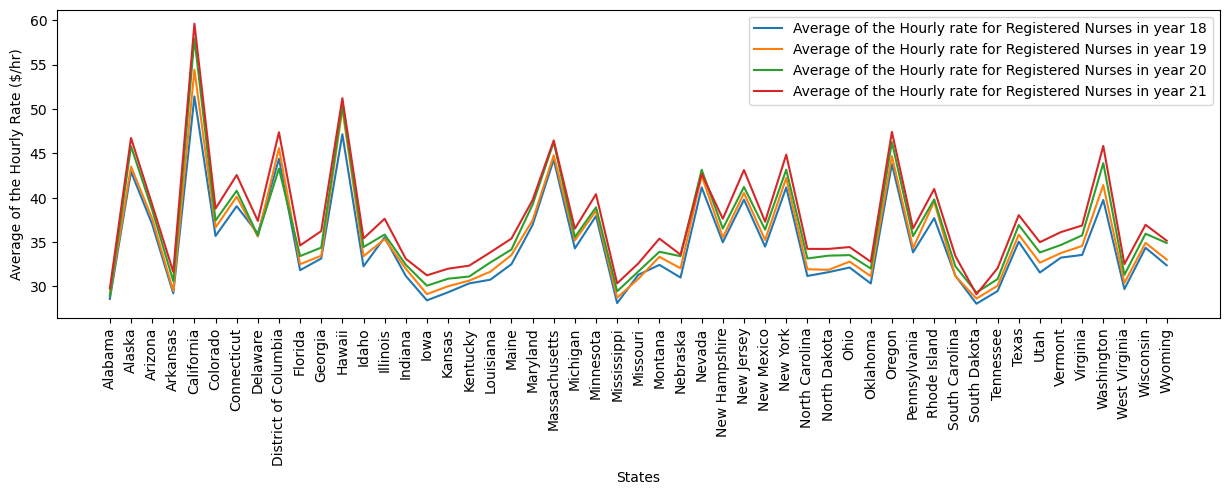

In [4]:
plt.figure(figsize=(15,4))
for i in range(18, 22):
    plt.plot(gen_data_states['AREA_TITLE'], gen_data_states[f'H_MEAN {str(i)}'].astype(float), 
             label = f'Average of the Hourly rate for Registered Nurses in year {str(i)}')
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.xlabel('States')
plt.ylabel('Average of the Hourly Rate ($/hr)')
plt.show()


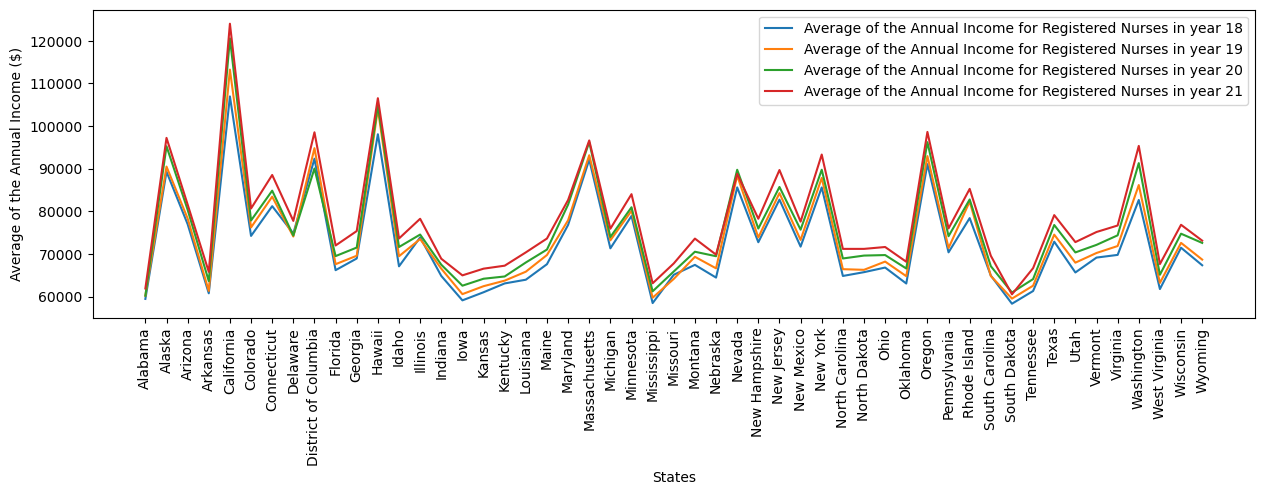

In [5]:
plt.figure(figsize=(15,4))
for i in range(18, 22):
    plt.plot(gen_data_states['AREA_TITLE'], gen_data_states[f'A_MEAN {str(i)}'].str.replace(',', '').astype(float), 
             label = f'Average of the Annual Income for Registered Nurses in year {str(i)}')
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.xlabel('States')
plt.ylabel('Average of the Annual Income ($)')
plt.show()


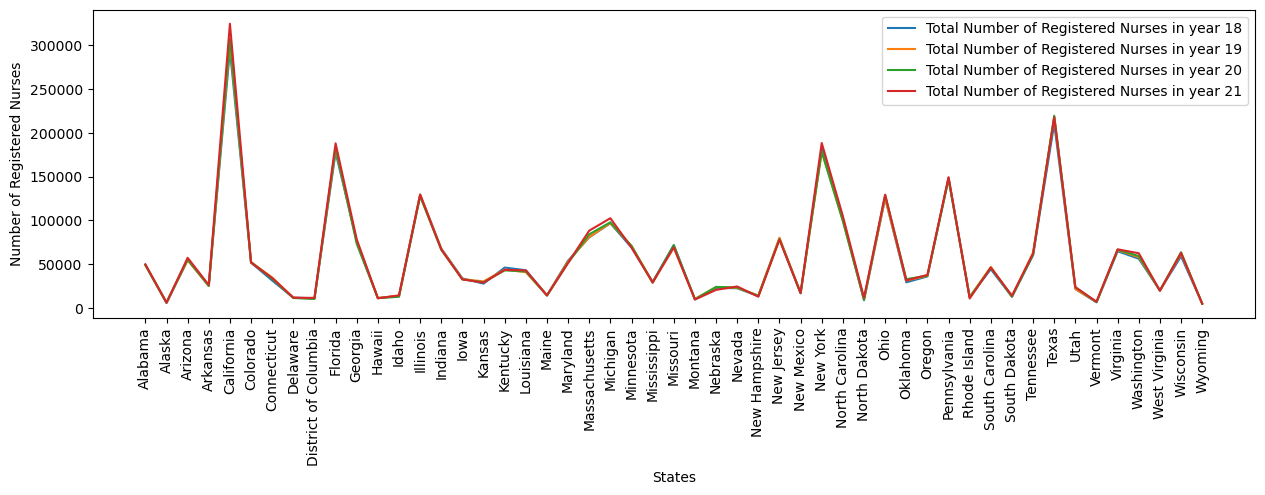

In [6]:
plt.figure(figsize=(15,4))
for i in range(18, 22):
    plt.plot(gen_data_states['AREA_TITLE'], gen_data_states[f'TOT_EMP {str(i)}'].str.replace(',', '').astype(float), 
             label = f'Total Number of Registered Nurses in year {str(i)}')
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.xlabel('States')
plt.ylabel('Number of Registered Nurses')
plt.show()


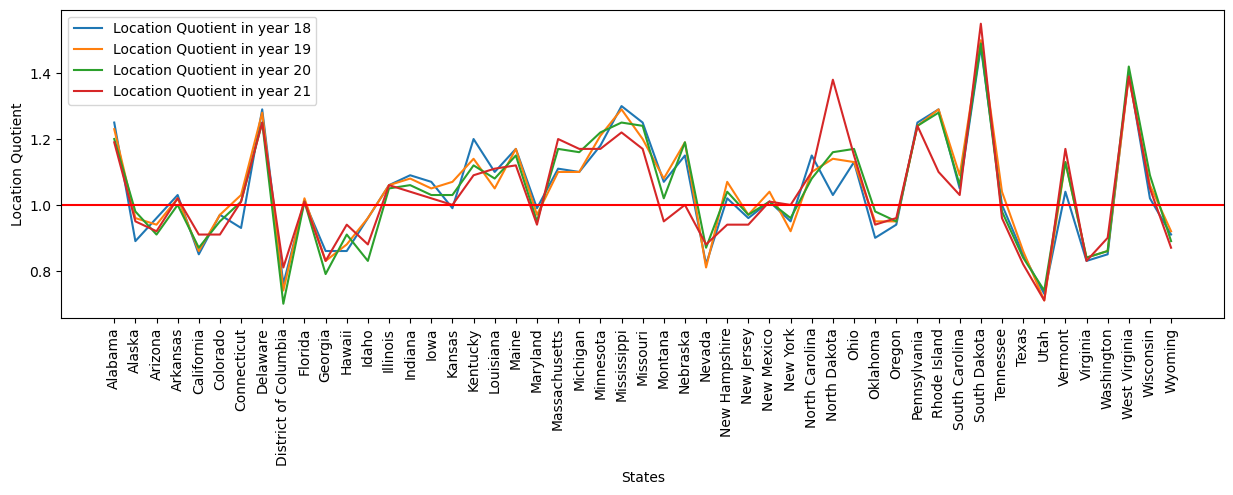

In [7]:
plt.figure(figsize=(15,4))
for i in range(18, 22):
    plt.plot(gen_data_states['AREA_TITLE'], gen_data_states[f'LOC_QUOTIENT {str(i)}'].astype(float), 
             label = f'Location Quotient in year {str(i)}')
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.xlabel('States')
plt.ylabel('Location Quotient')
plt.axhline(y=1.0, color='r', linestyle='-')
plt.show()


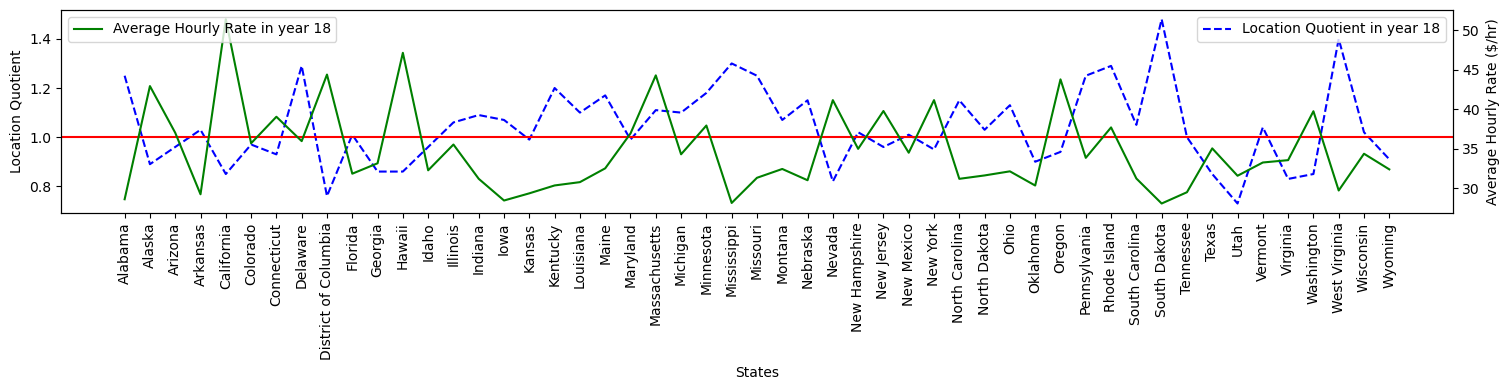

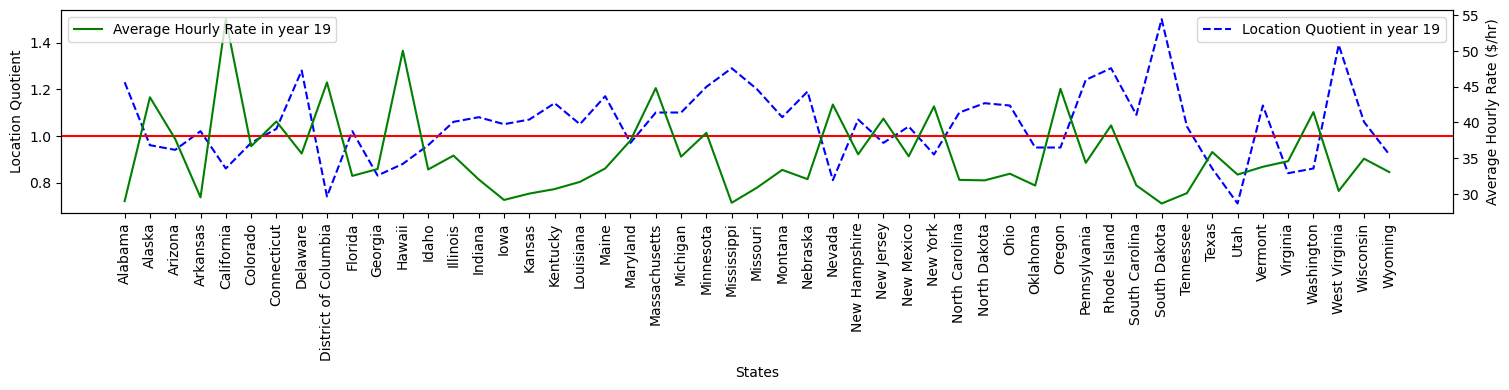

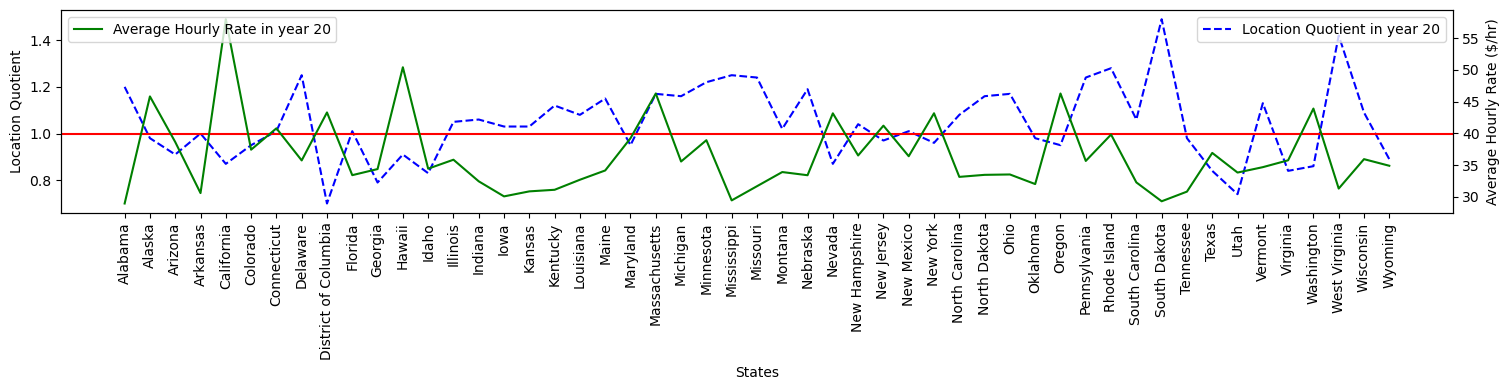

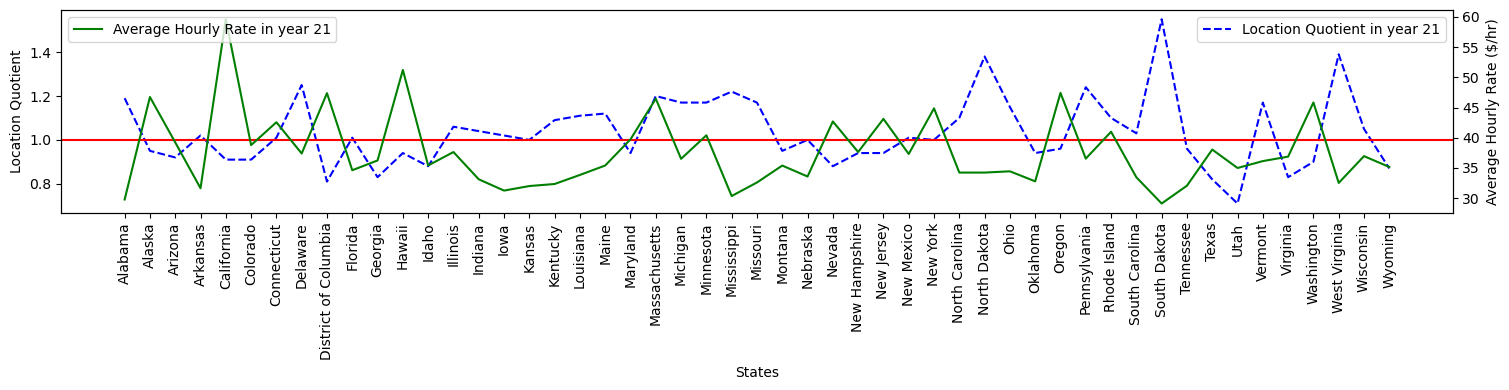

In [8]:
import warnings
warnings.filterwarnings("ignore")
for i in range(18, 22):
    fig, ax1 = plt.subplots(figsize=(15,4))
    ax1.plot(gen_data_states['AREA_TITLE'], gen_data_states[f'LOC_QUOTIENT {str(i)}'].astype(float), color='b', 
             label = f'Location Quotient in year {str(i)}', linestyle ='--')
    ax1.set_xlabel('States')
    ax1.set_ylabel('Location Quotient')
    plt.legend(loc='upper right')
    ax1.set_xticklabels(gen_data_states['AREA_TITLE'], rotation = 90)
    ax1.axhline(y=1.0, color='r', linestyle='-')
    ax2 = ax1.twinx()
    ax2.plot(gen_data_states['AREA_TITLE'], gen_data_states[f'H_MEAN {str(i)}'].astype(float), color='g',
            label = f'Average Hourly Rate in year {str(i)}')
    fig.tight_layout()
    ax2.set_xticklabels(gen_data_states['AREA_TITLE'], rotation = 90)
    plt.legend(loc='upper left')
    ax2.set_ylabel('Average Hourly Rate ($/hr)')
    plt.show()


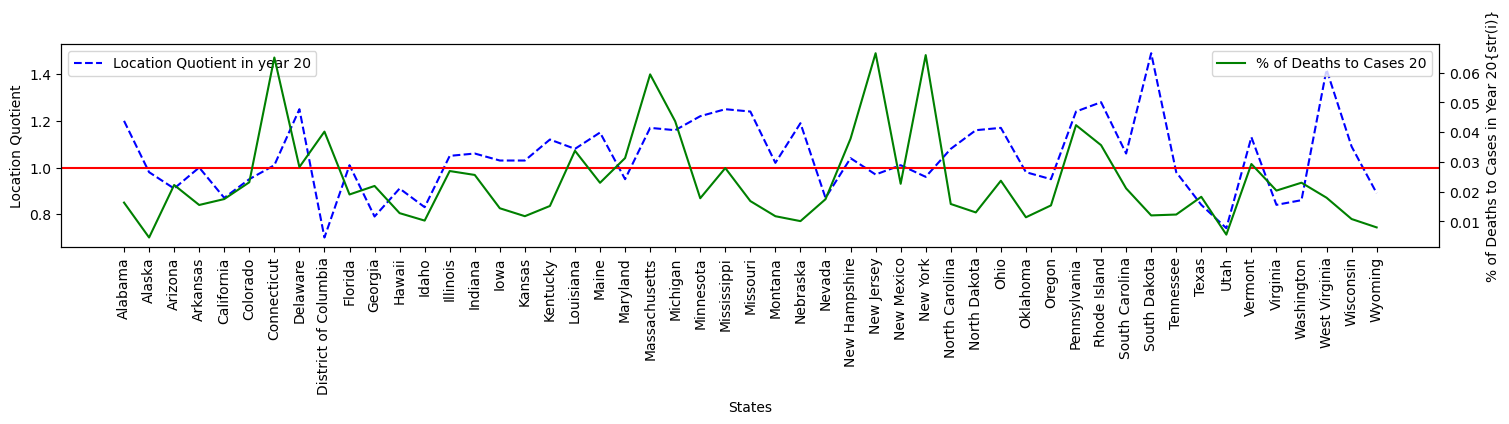

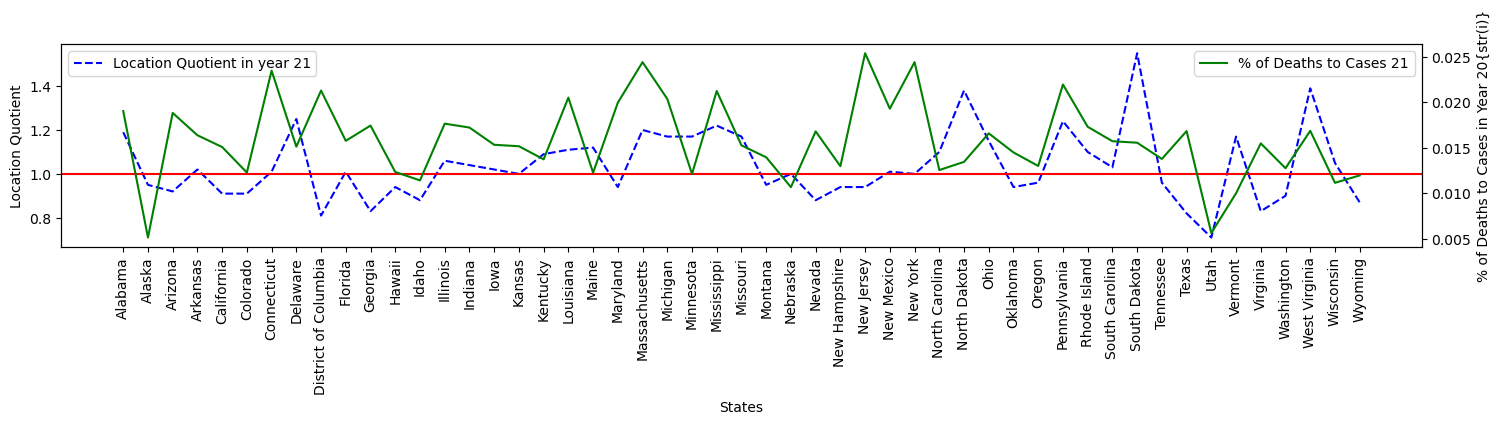

In [9]:
import warnings
warnings.filterwarnings("ignore")

for i in range(20, 22):
    fig, ax1 = plt.subplots(figsize=(15,4))
    ax1.plot(gen_data_states['AREA_TITLE'], gen_data_states[f'LOC_QUOTIENT {str(i)}'].astype(float), color='b', 
             label = f'Location Quotient in year {str(i)}', linestyle ='--')
    ax1.set_xlabel('States')
    ax1.set_ylabel('Location Quotient')
    plt.legend(loc='upper left')
    ax1.set_xticklabels(gen_data_states['AREA_TITLE'], rotation = 90)
    ax1.axhline(y=1.0, color='r', linestyle='-')
    ax2 = ax1.twinx()
    ax2.plot(gen_data_states['AREA_TITLE'], gen_data_states[f'% of Deaths to Cases in Year {str(i)}'].astype(float), color='g',
            label = f'% of Deaths to Cases {str(i)}')
    fig.tight_layout()
    ax2.set_xticklabels(gen_data_states['AREA_TITLE'], rotation = 90)
    plt.legend(loc='upper right')
    ax2.set_ylabel('% of Deaths to Cases in Year 20{str(i)}')
    plt.show()
